# Hypothyroidism
: deficient activity of the thyroid gland; also : a resultant bodily condition characterized by lowered metabolic rate and general loss of vigor

This dataset comes from UCI Machine Learning Repository.  It is intended as a practice set for machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%matplotlib inline

In [2]:
ht = pd.read_csv('hypothyroid data.csv', header=None)

Change column names

In [3]:
ht.columns=['hypothyroid','age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthryoid','pregnant','sick','tumor','lithium','goiter','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

In [4]:
print(ht.columns)

Index(['hypothyroid', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthryoid', 'pregnant', 'sick', 'tumor', 'lithium', 'goiter',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')


Possible interesting data to visualize:<br/>
''Hypothyroid levels of TSH, TT4, and T3 vs 'negative'<br/>
''dispurstion of hypothyroid among the sexes<br/>
levels of TSH, TT4 and T3 within hypothyroid patients when on thyroxine vs not<br/>

Replace empty values with 'NA' and add zeroes to the front of integers and floats for correct sorting

In [5]:
ht = ht.replace('?', None)

Convert Strings to ints and floats

In [6]:
for index, age in enumerate(ht['age']):
    ht['age'][index] = int(age)
        
for index, T3 in enumerate(ht['T3']):
    ht['T3'][index] = float(T3)
            
for index, TSH in enumerate(ht['TSH']):
    ht['TSH'][index] = float(TSH)
            
for index, TT4 in enumerate(ht['TT4']):
    ht['TT4'][index] = float(TT4)
    
for index, T4U in enumerate(ht['T4U']):
    ht['T4U'][index] = float(T4U)

Briefly describe the data for a quick overview

In [7]:
ht.groupby('sex').describe()

FTI                  FTI_measured                       T3         ...   \
    count unique  top freq        count unique top  freq   count unique  ...    
sex                                                                      ...    
F    2234    252   98   43         2234      2   y  2024  2234.0   69.0  ...    
M     929    177  107   26          929      2   y   892   929.0   51.0  ...    

    sick       thyroid_surgery                  tumor                   
     top  freq           count unique top  freq count unique top  freq  
sex                                                                     
F      f  2169            2234      2   f  2151  2234      2   f  2205  
M      f   895             929      2   f   908   929      2   f   918  

[2 rows x 100 columns]

Change figure size to make numbers on axes readable

In [8]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

[6.0, 4.0]


In [9]:
fig_size[0]=25
fig_size[1]=16
plt.rcParams["figure.figsize"] = fig_size

My attempts at a histogram failed. I could not figure out why the operation would get stuck or hung up unless it used a sorted list of strings.  I need to data to be ints for other graphs, so my next best solution was to create a bar graph with each unique value on the x-axis and a count of that value as it's height.

In [10]:
#get rid of None values in list

#ageList = []
#for index, age in enumerate(ht['age']):
#    if age != None
#        ageList.append(ht['age'][index])

#plt.hist(ht['age'].sort_values(), bins=[0,10,20,30,40,50,60,70,80,90,100]) 
#plt.hist(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])], bins = 10)
#plt.hist(ht['age'].loc[ht['hypothyroid'].isin(['negative'])], bins=[0,10,20,30,40,50,60,70,80,90,100], color='orange', alpha=.5)

In [11]:
print(np.unique(ht['age']))
print(ht['age'].value_counts(sort=False))

[1 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77
 78 79 80 81 82 83 84 85 86 87 88 89 90 92 93 97 98]
1      4
4      1
5      1
6      2
7      1
8      2
9      3
10     2
11     4
12     8
13     8
14    10
15    23
16    20
17    28
18    28
19    22
20    28
21    23
22    29
23    27
24    53
25    27
26    41
27    53
28    71
29    41
30    45
31    36
32    49
      ..
65    49
66    45
67    42
68    55
69    42
70    67
71    56
72    72
73    62
74    46
75    38
76    47
77    44
78    49
79    34
80    30
81    12
82    16
83    12
84    26
85    24
86    14
87    12
88     4
89     4
90     1
92     2
93     1
97     1
98     2
Name: age, Length: 92, dtype: int64


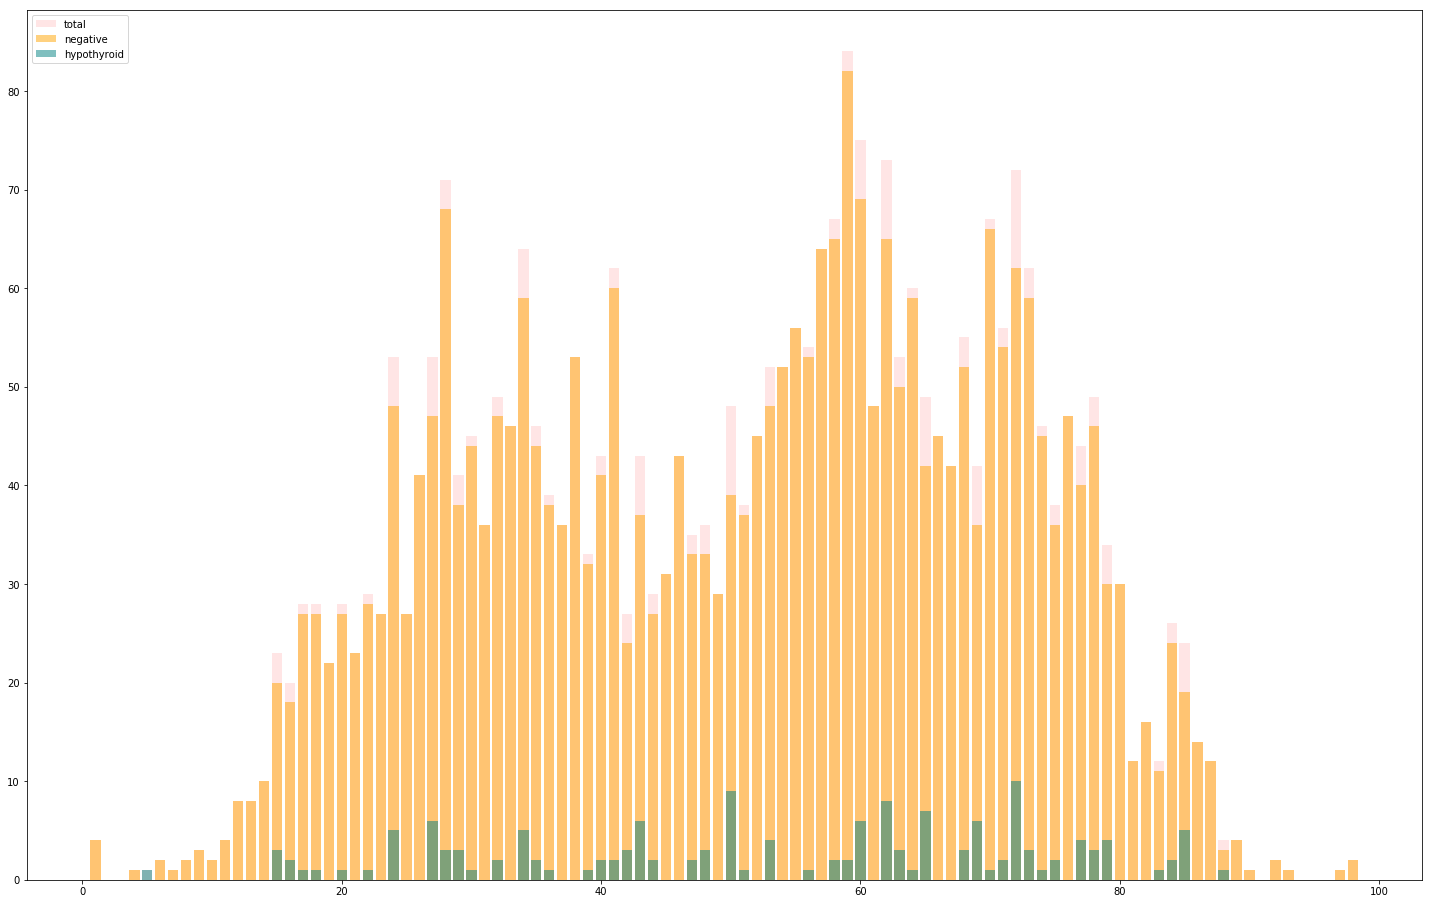

In [12]:

plt.bar(x=np.unique(ht['age']),
        height=ht['age'].value_counts(sort=False), 
        color='red', alpha=.1, label='total')
plt.bar(x=np.unique(ht['age'].loc[ht['hypothyroid'].isin(['negative'])]),
        height=ht['age'].loc[ht['hypothyroid'].isin(['negative'])].value_counts(sort=False), 
        color='orange', alpha=.5, label='negative')
plt.bar(x=np.unique(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])]),
        height=ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])].value_counts(sort=False), 
        color='teal',alpha=.5, label='hypothyroid')

plt.legend(loc='upper left')

The groups are not equally represented with a large n for 'negative' and a relatively small n for 'hypothyroid'

Scatter plots to visual spread of data by age

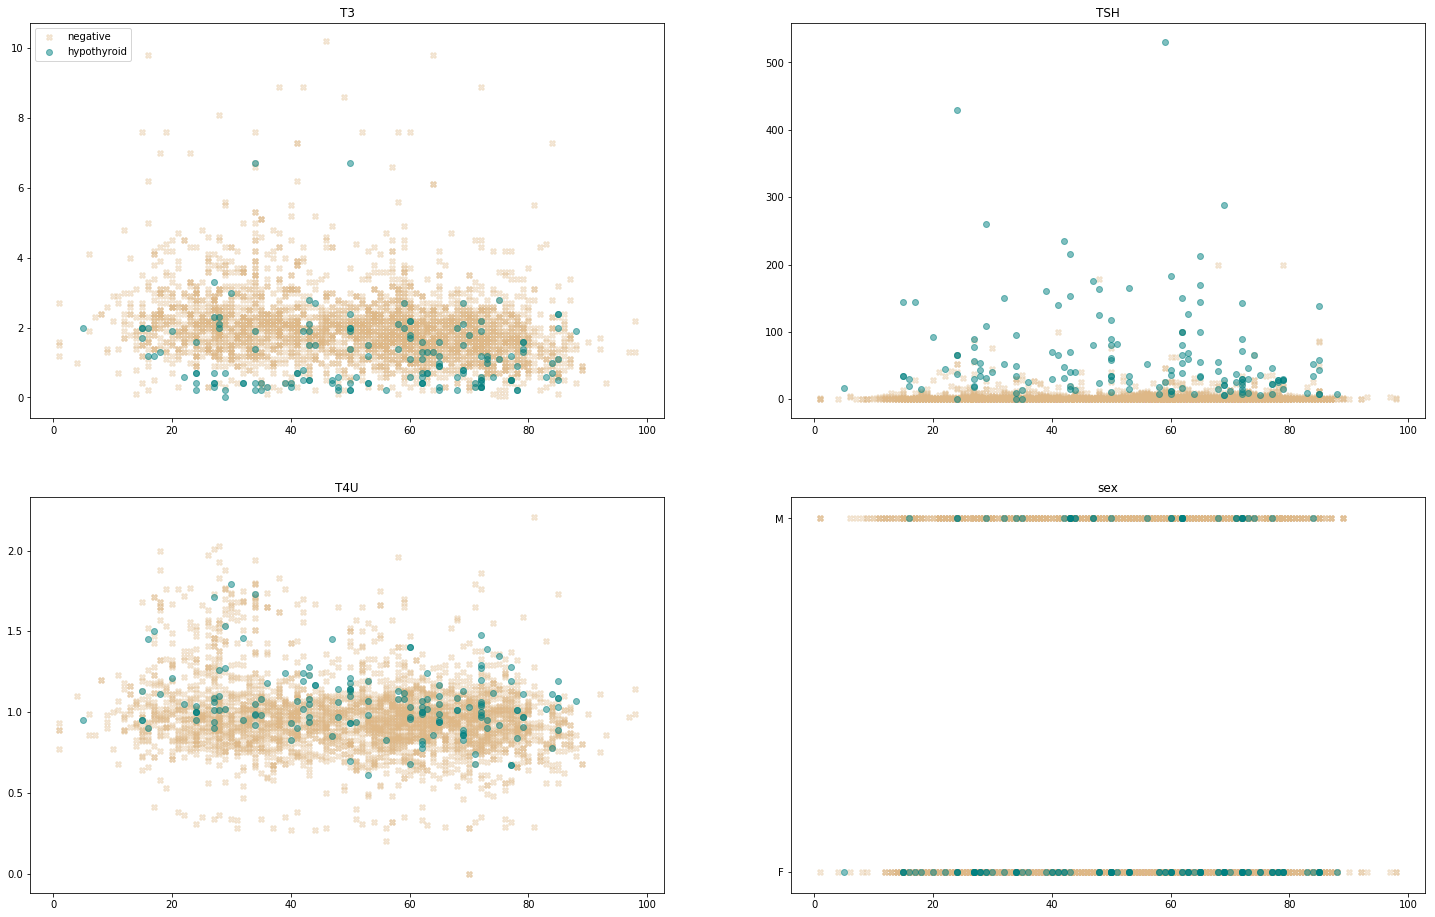

<Figure size 2160x2160 with 0 Axes>

In [13]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(30, 30))


axarr[0,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['T3'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   ht['T3'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])], 
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['T4U'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,0].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['T4U'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('T4U')


axarr[1,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['sex'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,1].scatter(ht['age'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['sex'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

plt.show()

Viewing 'Hypothyroid' conditions over 'negative' conditions.

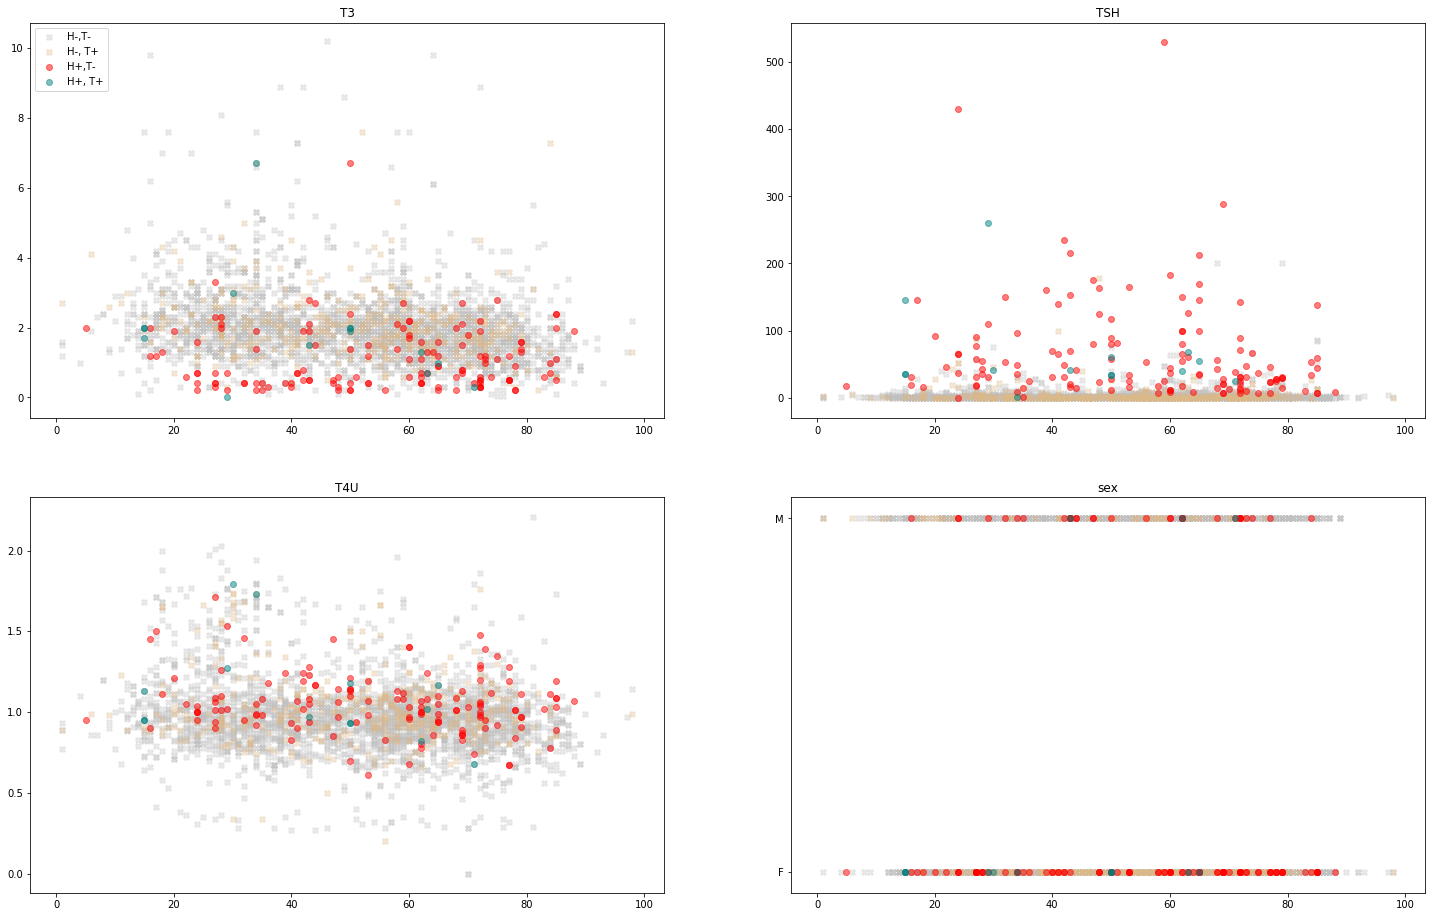

<Figure size 1440x1440 with 0 Axes>

In [14]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))


axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='H-,T-', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='H-, T+', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='H+,T-')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='H+, T+')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='hypothyroid')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='hypothyroid')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('T4U')


axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='hypothyroid')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

plt.show()

Questions:<br/>
-are these measurements pre or post Thyroxine?  If post - how long was each person on thyroxine? (i.e. are these the stable levels after equilibrating the meds?).

Viewing Thyroxine conditions over non-thyroxine conditions.

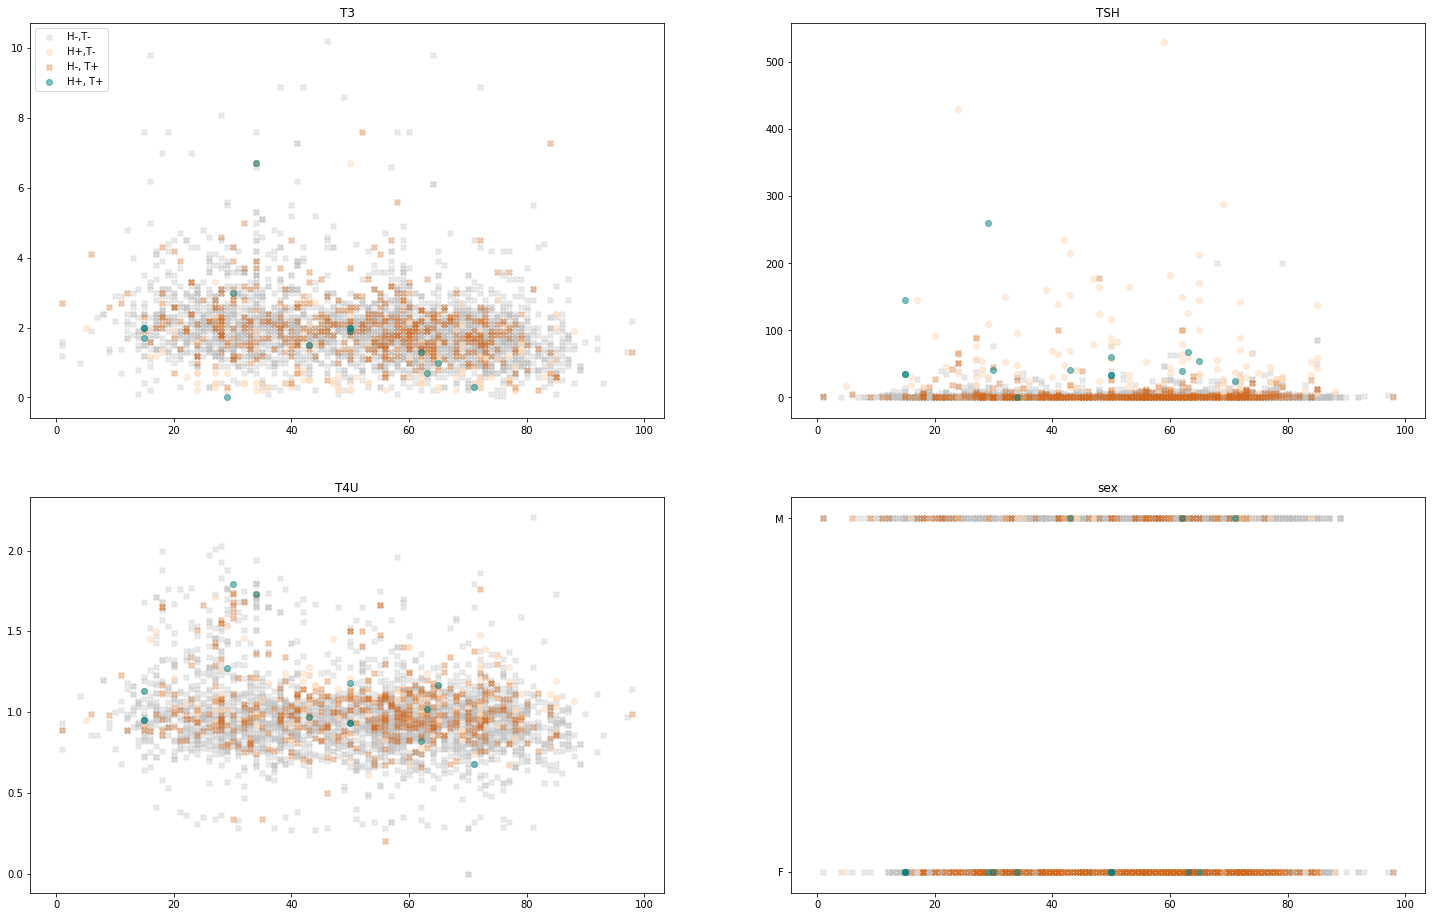

<Figure size 1440x1440 with 0 Axes>

In [15]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))


axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='H-,T-', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='H+,T-')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='H-, T+', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='H+, T+')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='hypothyroid')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='hypothyroid', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='hypothyroid')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='hypothyroid', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('T4U')


axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='peachpuff', alpha=.5, label='hypothyroid')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='chocolate', alpha=.3, label='hypothyroid', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='hypothyroid')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

plt.show()

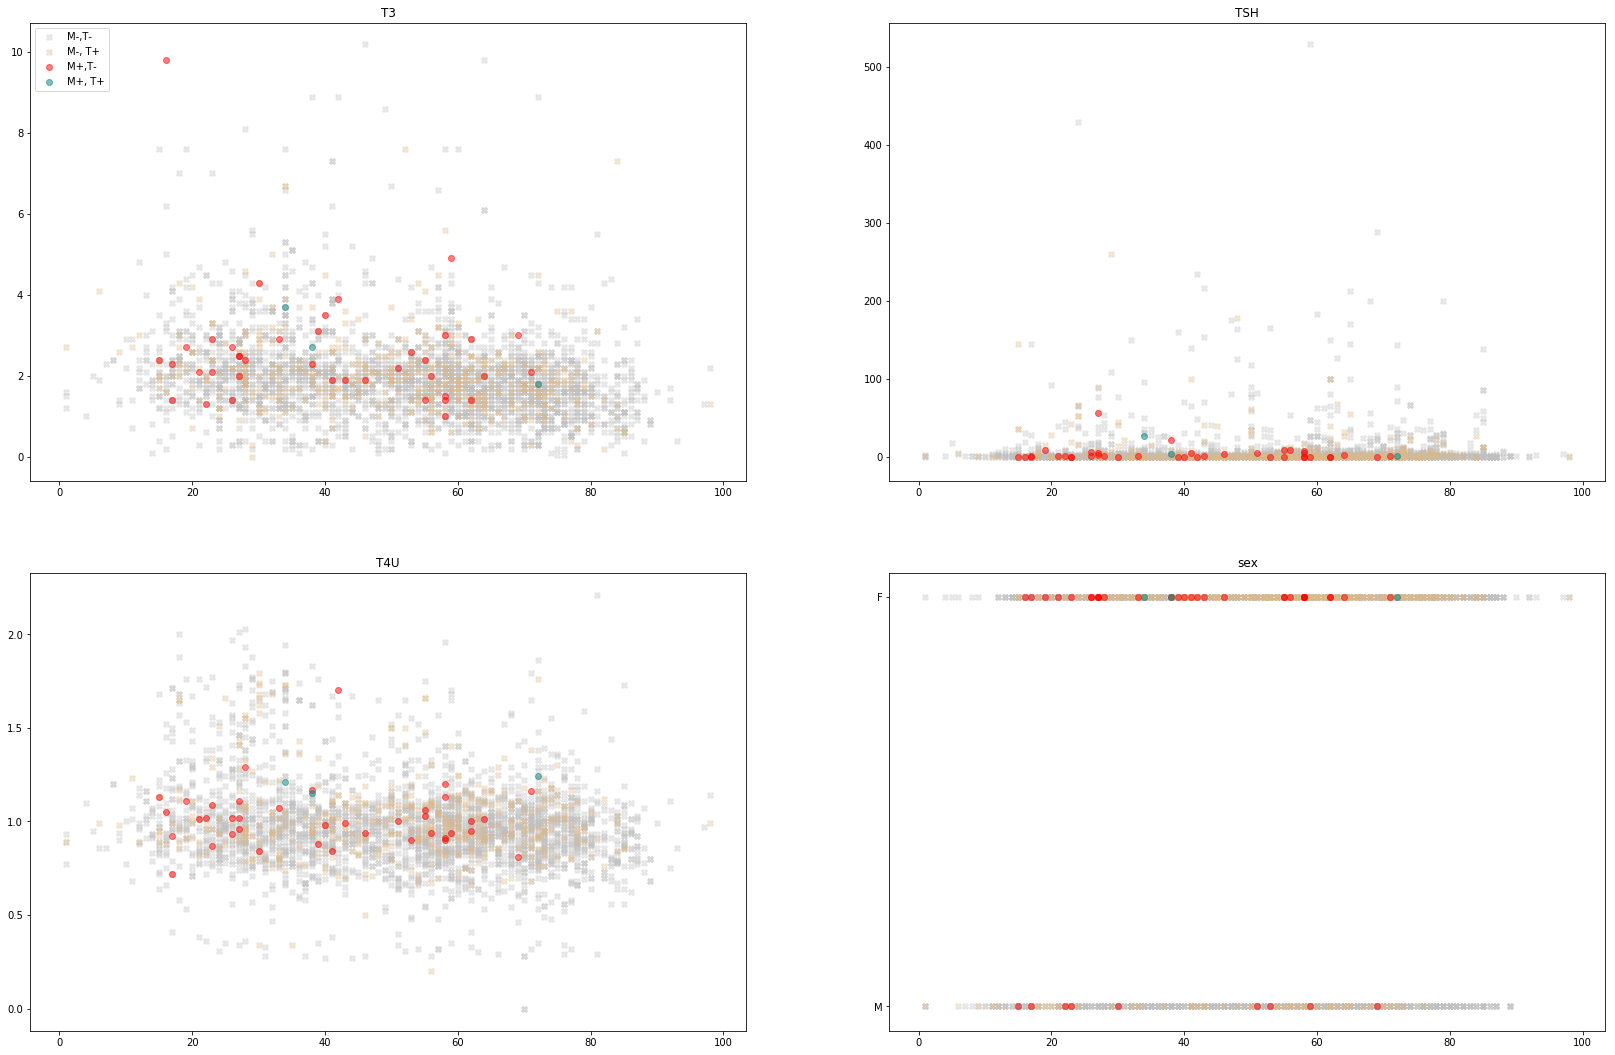

<Figure size 1440x1440 with 0 Axes>

In [16]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))


axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[0,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')


#axarr[0,0].xlabel('age')
#axarr[0,0].ylabel('T3 levels')
axarr[0,0].legend(loc='upper left',prop={'size': 10});
axarr[0,0].set_title('T3')



axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[0,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')

#axarr[0,1].xlabel('age')
#axarr[0,1].ylabel('TSH levels')
#axarr[0,1].legend(loc='upper left',prop={'size': 20});
axarr[0,1].set_title('TSH')



axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[1,0].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')

#axarr[1,0].xlabel('age')
#axarr[1,0].ylabel('TT4 levels')
#axarr[1,0].legend(loc='upper left',prop={'size': 20});
axarr[1,0].set_title('T4U')


axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label='M-,T-', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label='M-, T+', marker='X')
axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label='M+,T-')
axarr[1,1].scatter(ht['age'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label='M+, T+')

#axarr[1,1].xlabel('age')
#axarr[1,1].ylabel('sex')
#axarr[1,1].legend(loc='upper left',prop={'size': 5});
axarr[1,1].set_title('sex')

x.subplots_adjust(top=1, right=1)

plt.show()

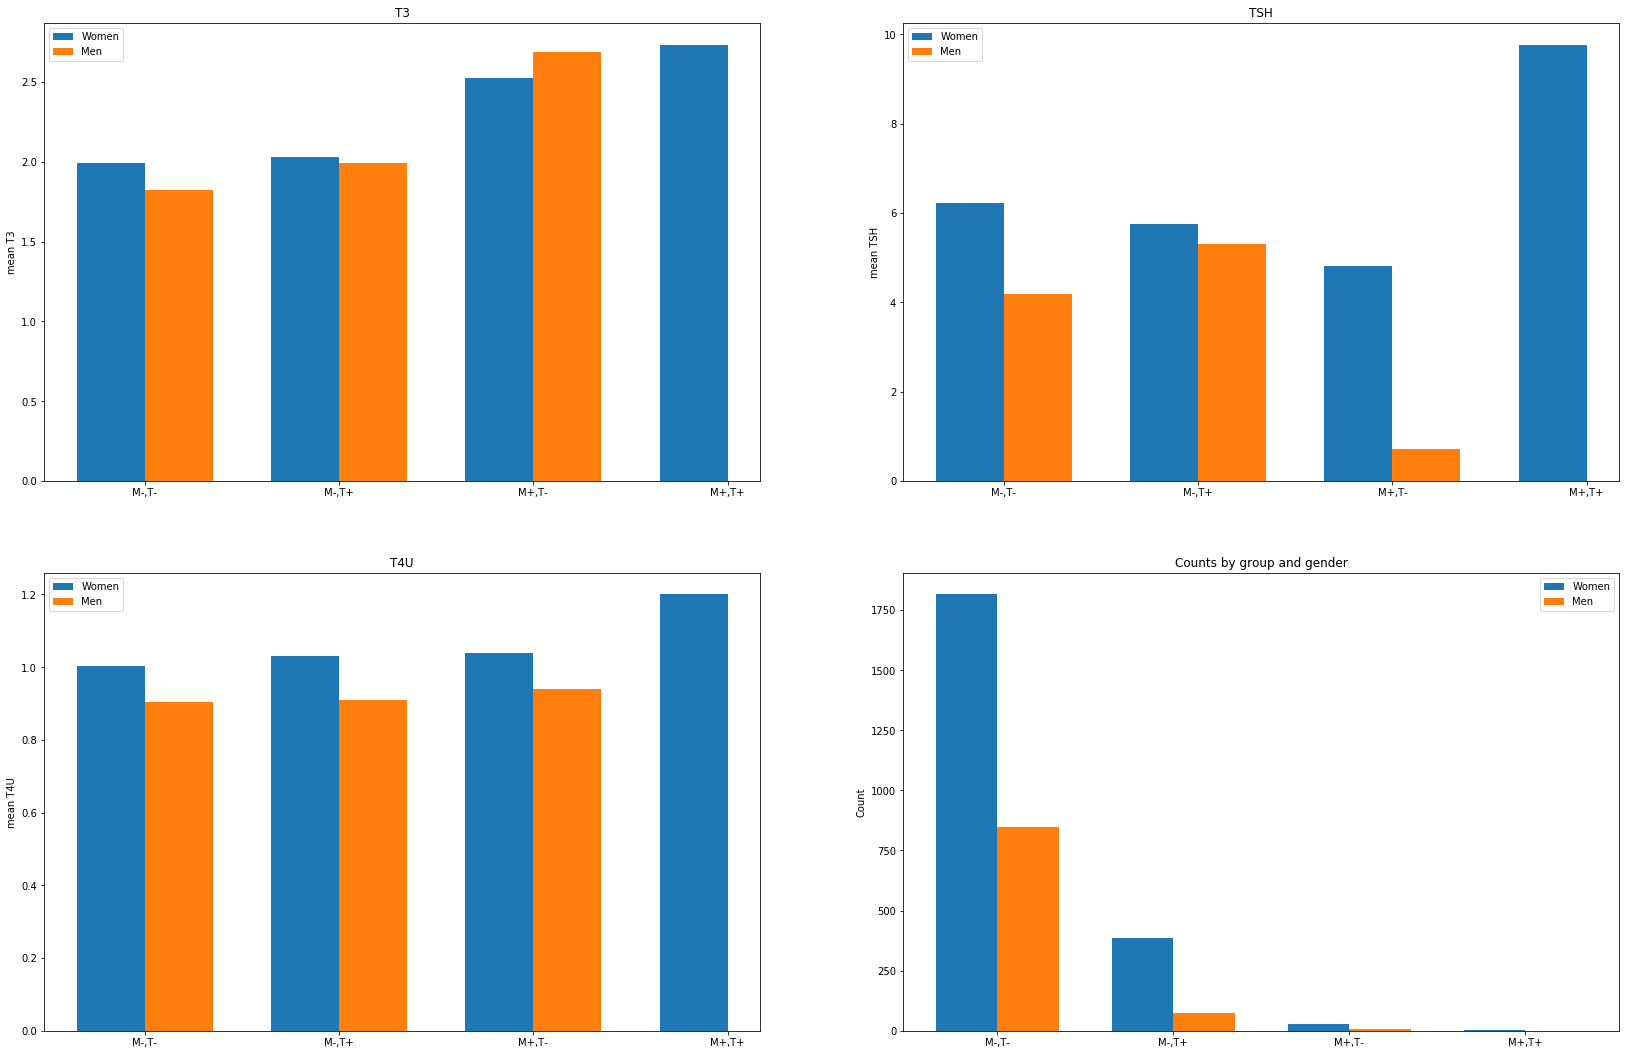

<Figure size 1440x1440 with 0 Axes>

In [17]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))
ind = np.arange(4)
width = 0.35

axarr[0,0].bar(ind, np.array([
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                &(ht['sex'].isin(['F']))].mean(),
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                &(ht['sex'].isin(['F']))].mean(),
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                &(ht['sex'].isin(['F']))].mean(),
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                &(ht['sex'].isin(['F']))].mean()])
    , width)
axarr[0,0].bar(ind+width, np.array([
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                &(ht['sex'].isin(['M']))].mean(),
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                &(ht['sex'].isin(['M']))].mean(),
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                &(ht['sex'].isin(['M']))].mean(),
    ht['T3'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                &(ht['sex'].isin(['M']))].mean()])
    , width)
axarr[0,0].set_title('T3')
axarr[0,0].set_ylabel('mean T3')
axarr[0,0].set_xticks(ind + width / 2)
axarr[0,0].set_xticklabels(('M-,T-', 'M-,T+', 'M+,T-', 'M+,T+'))
axarr[0,0].legend(('Women', 'Men'))



axarr[0,1].bar(ind, np.array([
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['F']))].mean(),
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['F']))].mean(),
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['F']))].mean(),
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['F']))].mean()])
    , width)
axarr[0,1].bar(ind+width, np.array([
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['M']))].mean(),
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['M']))].mean(),
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['M']))].mean(),
    ht['TSH'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['M']))].mean()
    ]), width)
axarr[0,1].set_title('TSH')
axarr[0,1].set_ylabel('mean TSH')
axarr[0,1].set_xticks(ind + width / 2)
axarr[0,1].set_xticklabels(('M-,T-', 'M-,T+', 'M+,T-', 'M+,T+'))
axarr[0,1].legend(('Women', 'Men'))



axarr[1,0].bar(ind,np.array([
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['F']))].mean(),
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['F']))].mean(),
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['F']))].mean(),
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['F']))].mean()])
    , width)
axarr[1,0].bar(ind + width,np.array([
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['M']))].mean(),
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['M']))].mean(),
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                 &(ht['sex'].isin(['M']))].mean(),
    ht['T4U'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                 &(ht['sex'].isin(['M']))].mean()])
    , width)
axarr[1,0].set_title('T4U')
axarr[1,0].set_ylabel('mean T4U')
axarr[1,0].set_xticks(ind + width / 2)
axarr[1,0].set_xticklabels(('M-,T-', 'M-,T+', 'M+,T-', 'M+,T+'))
axarr[1,0].legend(('Women', 'Men'))


axarr[1,1].bar(ind, np.array([
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                  &(ht['sex'].isin(['F']))].count(),
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                  &(ht['sex'].isin(['F']))].count(),
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                  &(ht['sex'].isin(['F']))].count(),
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                  &(ht['sex'].isin(['F']))].count()]),
    width

)
axarr[1,1].bar(ind + width, np.array([
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['f']))
                  &(ht['sex'].isin(['M']))].count(),
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['f']))&(ht['on_thyroxine'].isin(['t']))
                  &(ht['sex'].isin(['M']))].count(),
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['f']))
                  &(ht['sex'].isin(['M']))].count(),
    ht['sex'].loc[(ht['on_antithyroid_medication'].isin(['t']))&(ht['on_thyroxine'].isin(['t']))
                  &(ht['sex'].isin(['M']))].count()]), 
    width)
axarr[1,1].set_ylabel('Count')
axarr[1,1].set_title('Counts by group and gender')
axarr[1,1].set_xticks(ind + width / 2)
axarr[1,1].set_xticklabels(('M-,T-', 'M-,T+', 'M+,T-', 'M+,T+'))
axarr[1,1].legend(('Women', 'Men'))

x.subplots_adjust(top=1, right=1)

plt.show()

After looking at the data and looking through the information provided with the data set there is not enough information to do a comparative study, for example a before and after medication, or comparison between treatments.  
So I will approach this data set from a diagnosis perspective (as it was intended for machine learning) but using clinical criteria to diagnose individuals with hashomoto's hypothyroid.  The results could then potentially be compared to Machine Learning results as a measure of performance.

In clincial evalutation of Hashimoto's Thyroiditis detection almost always begins with high blood levels of TSH (Thyroid Stimulating Hormone).  
Normal levels are now referenced in the range: 0.3-3.0 uIU/L (but some labs use the old reference range of 0.2-8.0 uIU/L)
Hashimoto's is usually diagnosed as mild beginning at 4.0 mIU/L
Pregnancy can cause TSH levels to be elevated as well.

Using the above criteria I will select individuals from the data base who's TSH levels are above 4.0 mU/L(or ulU/mL)

In [18]:
#percent of the total dataset with elevated TSH levels
print((ht.loc[ht['TSH']> 4.0].count()/ht.count())*100)

hypothyroid                  17.35694
age                          17.35694
sex                          17.35694
on_thyroxine                 17.35694
query_on_thyroxine           17.35694
on_antithyroid_medication    17.35694
thyroid_surgery              17.35694
query_hypothyroid            17.35694
query_hyperthryoid           17.35694
pregnant                     17.35694
sick                         17.35694
tumor                        17.35694
lithium                      17.35694
goiter                       17.35694
TSH_measured                 17.35694
TSH                          17.35694
T3_measured                  17.35694
T3                           17.35694
TT4_measured                 17.35694
TT4                          17.35694
T4U_measured                 17.35694
T4U                          17.35694
FTI_measured                 17.35694
FTI                          17.35694
TBG_measured                 17.35694
TBG                          17.35694
dtype: float

conditions that cause hypothyroidism that are not Hashimoto's are pregnancy and removal of the thyroid

In [19]:
#remove individuals who display hypothyroid levels of TSH who are pregnant or have had thyroid surgery
print(((ht.loc[(ht['TSH']>= 4.0) & (ht['pregnant'].isin(['f'])) & (ht['thyroid_surgery'].isin(['f']))].count()
       /ht.count())*100))

hypothyroid                  16.661397
age                          16.661397
sex                          16.661397
on_thyroxine                 16.661397
query_on_thyroxine           16.661397
on_antithyroid_medication    16.661397
thyroid_surgery              16.661397
query_hypothyroid            16.661397
query_hyperthryoid           16.661397
pregnant                     16.661397
sick                         16.661397
tumor                        16.661397
lithium                      16.661397
goiter                       16.661397
TSH_measured                 16.661397
TSH                          16.661397
T3_measured                  16.661397
T3                           16.661397
TT4_measured                 16.661397
TT4                          16.661397
T4U_measured                 16.661397
T4U                          16.661397
FTI_measured                 16.661397
FTI                          16.661397
TBG_measured                 16.661397
TBG                      

So roughly 12% potentially have Hashimoto's Thyroiditis.

The next markers looked at are T3, free T4, reverse T3, and anti TPO are secondary tests used to further evaluate the condition.
Norml T3 is typically between 100-200 ng/dL
Normal T4 is typically between 4.5-11.2 mg/dL
(both measurements are for free and unbound molecules; Total levels will not be considered)
anti-TPO measurements are not provided here.

In [20]:
#find high TSH patients with low T3 and/or low T4
print(((ht.loc[(ht['TSH']> 4.0)&
               ((ht['T3']<100)|(ht['T4U']<4.5))
               &(ht['pregnant'].isin(['f']))
               &(ht['thyroid_surgery'].isin(['f']))].count()
       /ht.count())*100))

hypothyroid                  16.123933
age                          16.123933
sex                          16.123933
on_thyroxine                 16.123933
query_on_thyroxine           16.123933
on_antithyroid_medication    16.123933
thyroid_surgery              16.123933
query_hypothyroid            16.123933
query_hyperthryoid           16.123933
pregnant                     16.123933
sick                         16.123933
tumor                        16.123933
lithium                      16.123933
goiter                       16.123933
TSH_measured                 16.123933
TSH                          16.123933
T3_measured                  16.123933
T3                           16.123933
TT4_measured                 16.123933
TT4                          16.123933
T4U_measured                 16.123933
T4U                          16.123933
FTI_measured                 16.123933
FTI                          16.123933
TBG_measured                 16.123933
TBG                      

In [22]:
#Check that my code is actually creating a subset of previous data
set1 = ht.loc[(ht['TSH']>40 & (ht['T3']<100)|(ht['T4U']<4.5))].index
set2 = ht.loc[(ht['TSH']> 4.0)&
               ((ht['T3']<100)|(ht['T4U']<4.5))
               &(ht['pregnant'].isin(['f']))
               &(ht['thyroid_surgery'].isin(['f']))].index

print(set2.issubset(set1))

AttributeError: 'Int64Index' object has no attribute 'issubset'